In [1]:
%matplotlib inline
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition

geo = "GSE58540"

In [2]:
data = GEOparse.get_GEO(geo=geo, destdir="../Dataset/Huang2016")

19-Oct-2021 17:32:49 DEBUG utils - Directory ../Dataset/Huang2016 already exists. Skipping.
19-Oct-2021 17:32:49 INFO GEOparse - File already exist: using local version.
19-Oct-2021 17:32:49 INFO GEOparse - Parsing ../Dataset/Huang2016\GSE58540_family.soft.gz: 
19-Oct-2021 17:32:49 DEBUG GEOparse - DATABASE: GeoMiame
19-Oct-2021 17:32:49 DEBUG GEOparse - SERIES: GSE58540
19-Oct-2021 17:32:49 DEBUG GEOparse - PLATFORM: GPL17107
19-Oct-2021 17:32:49 DEBUG GEOparse - SAMPLE: GSM1413168
19-Oct-2021 17:32:49 DEBUG GEOparse - SAMPLE: GSM1413169
19-Oct-2021 17:32:49 DEBUG GEOparse - SAMPLE: GSM1413170


In [3]:
data.metadata["platform_id"][0]

'GPL17107'

In [4]:
data.gpls[data.metadata["platform_id"][0]].table

""


In [5]:
list(data.gsms.values())[0].table

""


In [6]:
table = pd.concat((val.table.iloc[:,1:2] for val in data.gsms.values()), axis=1).transpose()

In [7]:
(table > 0).all(0)

Series([], dtype: bool)

In [8]:
#table = table.loc[:, (table > 0).all(0)]
table = table.dropna(1)

C:\Users\OLEFRE~1\AppData\Local\Temp/ipykernel_12988/3290136690.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  table = table.dropna(1)


In [9]:
table

""


In [10]:
np.mean(table)

Series([], dtype: float64)

In [11]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table)

In [12]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

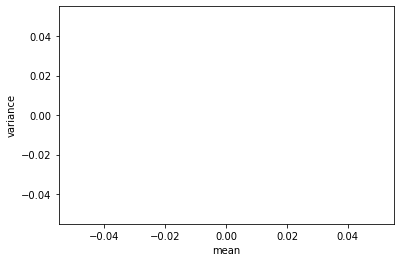

In [13]:
mean_variance_plot(table)

### Trying log-transformation

In [14]:
log_table = table#np.log2(table)

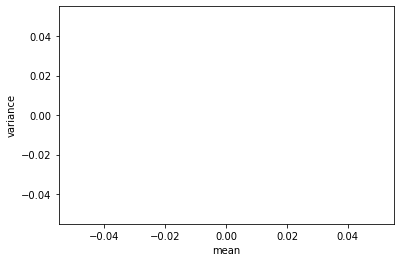

In [15]:
mean_variance_plot(log_table)

In [16]:
norm_log_table = log_table - np.mean(log_table)

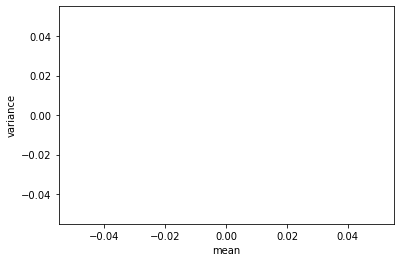

In [17]:
mean_variance_plot(norm_log_table)

In [18]:
pca = decomposition.PCA(n_components=2)

In [19]:
pca.fit(norm_log_table)

ValueError: at least one array or dtype is required

In [ ]:
components = pca.transform(norm_log_table)

In [46]:
components

array([[ 0.58039595, -5.18317225],
       [-0.37474342, -3.97005667],
       [-0.11723501, -3.6985565 ],
       ...,
       [ 1.45247223, -0.86070279],
       [ 2.43960189,  0.53088286],
       [ 2.12937121,  0.55691985]])

In [47]:
list(data.gsms.values())[-1].metadata

{'title': ['W999'],
 'geo_accession': ['GSM2026050'],
 'status': ['Public on Feb 29 2016'],
 'submission_date': ['Dec 31 2015'],
 'last_update_date': ['Feb 29 2016'],
 'type': ['RNA'],
 'channel_count': ['1'],
 'source_name_ch1': ['Serum'],
 'organism_ch1': ['Homo sapiens'],
 'taxid_ch1': ['9606'],
 'characteristics_ch1': ['group: SCREENING', 'sample type: Control'],
 'molecule_ch1': ['total RNA'],
 'extract_protocol_ch1': ['Blood collection: Blood samples (10 ml) were collected by standard phlebotomy before any analysis or instrumental procedure. The first 3 mL of blood were not used for serum preparation to prevent contamination by skin. Serum was prepared by collecting blood in tubes with clot activator (S-Monovette 7.5ml REF01.1601 â€“ Sarstedt), left at room temperature for 3 hours to clot, then spun at 3000 rpm (1000 g, Megafuge 2.0 Heraeus) for 10 minutes at RT. The serum was removed immediately after centrifugation, leaving a 0.5 cm leftover to avoid disturbing the serum-clot i

In [48]:
controls = np.array(["Control" in k.metadata["characteristics_ch1"][1] for k in list(data.gsms.values())])

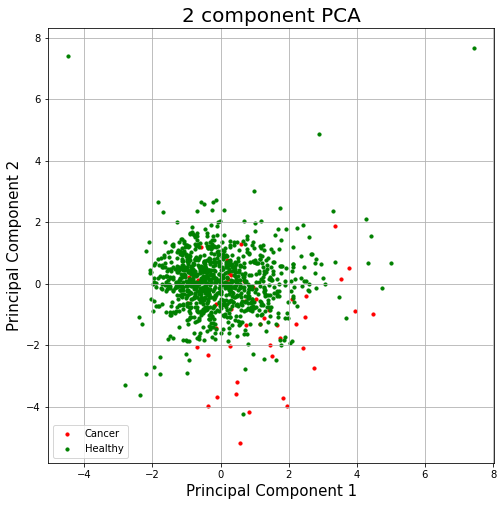

In [49]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

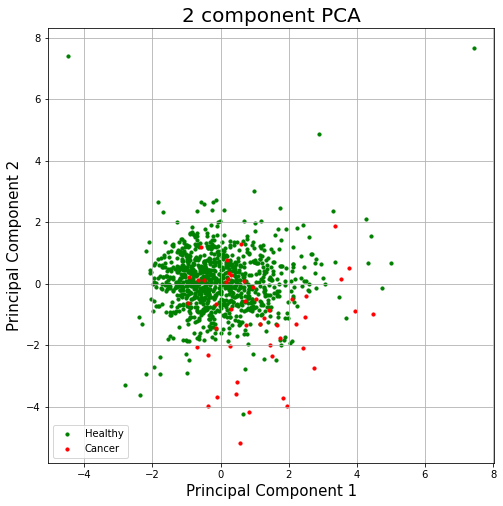

In [50]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy'][::-1]
colors = ['r', 'g']
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.legend(targets)
ax.grid()